## Observations and Insights 

The first observation is based on the box plot and the bar chart. From what we can see, while there are more mice in the Capomulin and Ramicane drug regimen, the size of the tumors for the mice that received this treatment teneded to have smaller tumors at the end of the trial than the other regimens. The second obervation is that there were more male mice tested than females. By not having equal number of both genders, this data is skewed to provide better information regarding male mice and their reaction to different drug regimens. The last observation is that the standard error is lowest for Capomulin and Ramicane drug regimen. Since they have a lower standard error, this means that they had more mice tested within these regimens, and the mice were not equally divided up.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseDF = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
# Display the data table for preview
mouseDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouseDF["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseDF["Mouse ID"].value_counts()
sum(mouseDF.duplicated(subset=["Mouse ID", "Timepoint"]))
(mouseDF["Mouse ID"] + mouseDF["Timepoint"].astype(str)).value_counts()

g9895     2
g98915    2
g98920    2
g9890     2
g98910    2
         ..
l5090     1
y6015     1
y76945    1
d25145    1
r1570     1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouseDF.duplicated(subset=["Mouse ID", "Timepoint"])
mouseDF.loc[mask]
mouseDF.iloc[860:873, :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = mouseDF["Mouse ID"] != "g989"
cMouseDF = mouseDF.loc[mask2].reset_index(drop=True)
cMouseDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
cMouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
cMouseDF["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drugGroups = cMouseDF.groupby("Drug Regimen")

avgTumor = drugGroups["Tumor Volume (mm3)"].mean()
medTumor = drugGroups["Tumor Volume (mm3)"].median()
varTumor = drugGroups["Tumor Volume (mm3)"].var()
stdTumor = drugGroups["Tumor Volume (mm3)"].std()
semTumor = drugGroups["Tumor Volume (mm3)"].sem()

summaryTable = pd.DataFrame()
summaryTable["Mean of Tumor Volume"] = avgTumor
summaryTable["Median of Tumor Volume"] = medTumor
summaryTable["Variance of Tumor Volume"] = varTumor
summaryTable["St. Deviation of Tumor Volume"] = stdTumor
summaryTable["St. Error of Tumor Volume"] = semTumor

summaryTable

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,St. Deviation of Tumor Volume,St. Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugGroups.agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]}) 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

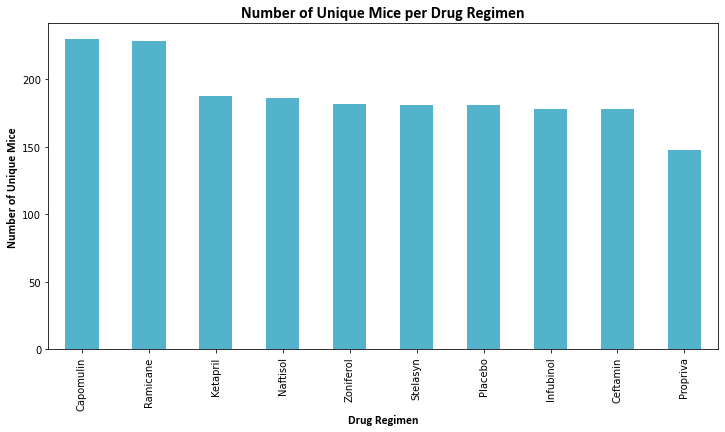

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(12,6))
cMouseDF["Drug Regimen"].value_counts().plot(kind="bar", color="#53B3CB")

plt.title("Number of Unique Mice per Drug Regimen", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Drug Regimen", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Number of Unique Mice", fontsize=12, fontweight="bold", fontname="Calibri")
plt.show()

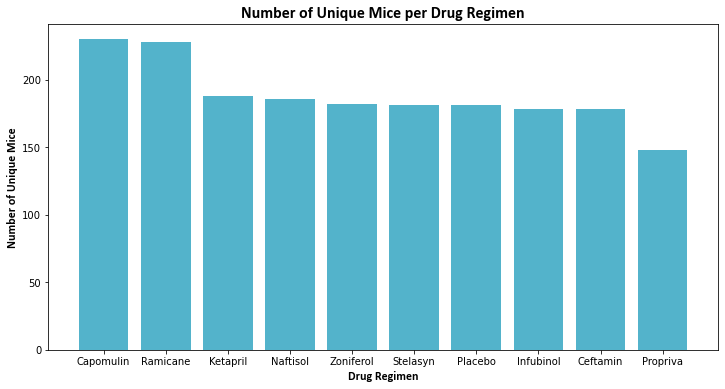

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = cMouseDF["Drug Regimen"].value_counts()
x = data.index
y = data.values

plt.figure(figsize=(12,6))
plt.bar(x,y, color="#53B3CB")

plt.title("Number of Unique Mice per Drug Regimen", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Drug Regimen", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Number of Unique Mice", fontsize=12, fontweight="bold", fontname="Calibri")
plt.show()

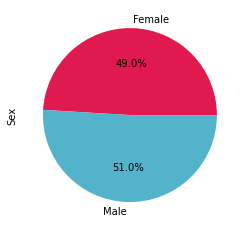

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plt.figure(figsize=(10,4))
cMouseDF.groupby("Sex")["Mouse ID"].count().plot(kind="pie", colors=["#E01A4F", "#53B3CB"], autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

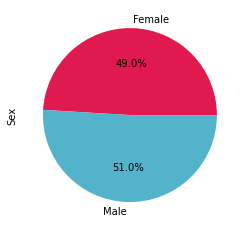

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cMouseDF.groupby("Sex")["Mouse ID"].count()
labels = ["Female", "Male"]

plt.figure(figsize=(10,4))
plt.pie(gender, labels=labels, colors=["#E01A4F", "#53B3CB"], autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
lastMouseDF = cMouseDF.loc[cMouseDF["Drug Regimen"].isin(regimens)]
lastMouseDF.groupby("Mouse ID").max().head()
maxMouse = lastMouseDF.groupby("Mouse ID").Timepoint.max().reset_index()

regimenDF =  pd.DataFrame()

for index, row in maxMouse.iterrows():
    mask2 = ((lastMouseDF["Mouse ID"] == row["Mouse ID"]) & (lastMouseDF["Timepoint"] == row["Timepoint"]))
    found = lastMouseDF.loc[mask2]
    regimenDF = regimenDF.append(found)
    
regimenDF = regimenDF.reset_index(drop=True)

regimenDF = lastMouseDF.merge(maxMouse, on=["Mouse ID", "Timepoint"])
regimenDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    
drugData = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = regimenDF.loc[regimenDF["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"Lower Quartile Temperatures: {lowerq}")
    print(f"Upper Quartile Temperatures: {upperq}")
    print(f"Interquartile Range of Temperatures: {iqr}")
    print(f"Median Temperatures: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    drugData.append(found.values)

Capomulin

Lower Quartile Temperatures: 32.37735684
Upper Quartile Temperatures: 40.1592203
Interquartile Range of Temperatures: 7.781863460000004
Median Temperatures: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane

Lower Quartile Temperatures: 31.56046955
Upper Quartile Temperatures: 40.65900627
Interquartile Range of Temperatures: 9.098536719999998
Median Temperatures: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol

Lower Quartile Temperatures: 54.04860769
Upper Quartile Temperatures: 65.52574285
Interquartile Range of Temperatures: 11.477135160000003
Median Temperatures: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin

Lower Quartile Temperatures: 48.72207785
Upper Quartile Temperatures: 64.29983003
Interquartile Range of Temperatures: 15.577752179999997
Median Temp

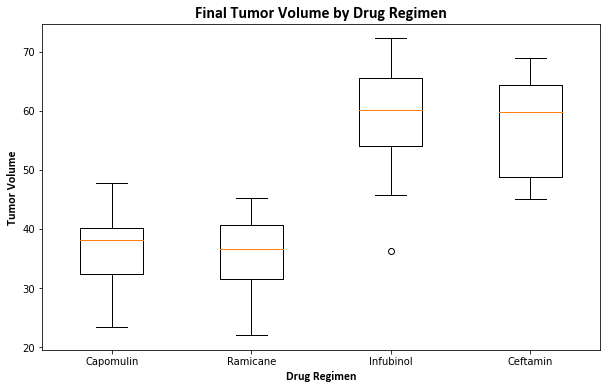

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(drugData, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.title("Final Tumor Volume by Drug Regimen", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Drug Regimen", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Tumor Volume", fontsize=12, fontweight="bold", fontname="Calibri")


plt.show()

## Line and Scatter Plots

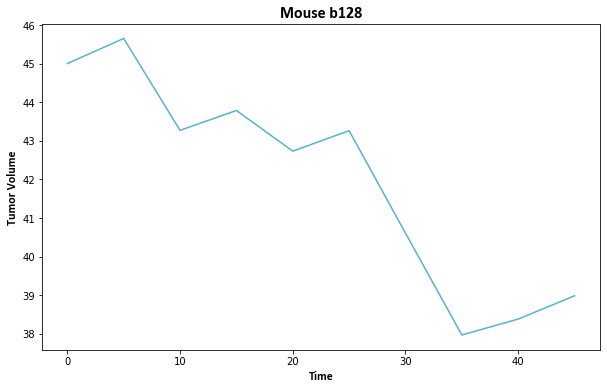

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cMouseDF.loc[cMouseDF['Mouse ID'] == "b128"].reset_index(drop=True)

plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="#53B3CB")

plt.title("Mouse b128", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Time", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Tumor Volume", fontsize=12, fontweight="bold", fontname="Calibri")

plt.show()

<ipython-input-18-4a997f958e3a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tumorDF = cMouseDF.loc[cMouseDF["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


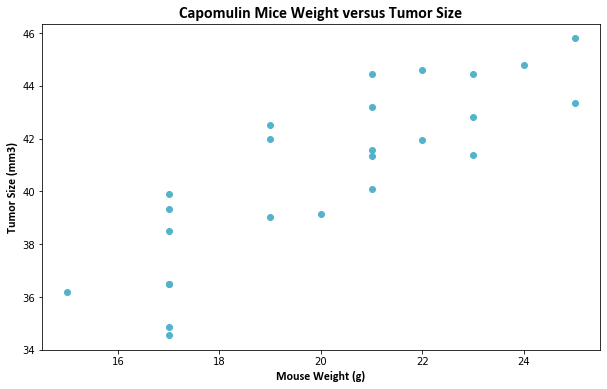

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumorDF = cMouseDF.loc[cMouseDF["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()

plt.figure(figsize=(10,6))

plt.scatter(tumorDF["Weight (g)"], tumorDF["Tumor Volume (mm3)"], color = "#53B3CB")
plt.title("Capomulin Mice Weight versus Tumor Size", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Mouse Weight (g)", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Tumor Size (mm3)", fontsize=12, fontweight="bold", fontname="Calibri")

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumorDF.corr() 

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


y = 0.95x + 21.55
R-Squared: 0.7088568047708717


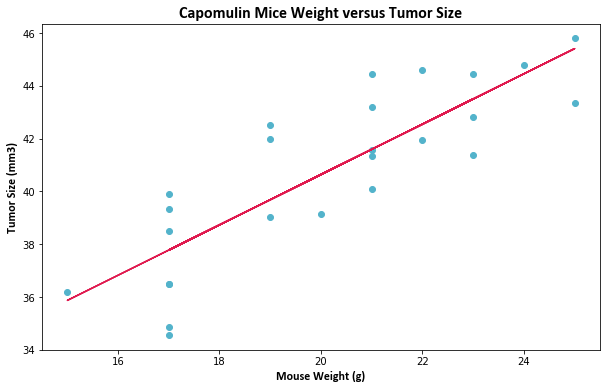

In [20]:
weight = tumorDF["Weight (g)"]
volume = tumorDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(weight, volume)
regressionVal = weight * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)
print(f"R-Squared: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(weight, volume, color = "#53B3CB")
plt.title("Capomulin Mice Weight versus Tumor Size", fontsize=16, fontweight="bold", fontname="Calibri")
plt.xlabel("Mouse Weight (g)", fontsize=12, fontweight="bold", fontname="Calibri")
plt.ylabel("Tumor Size (mm3)", fontsize=12, fontweight="bold", fontname="Calibri")
plt.plot(weight, regressionVal, color="#E01A4F")

plt.show()